In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/potdarmrunal/Hackethon10.3/main/adult.csv")
df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [3]:
# a. Data should not have null values
# 1. Extract Features and target
# b. Features should be numeric
# c. Features should be of the type array/ dataframe
# d. Features should have some rows and some columns
# 2. Split the dataset
# e. Features are on the same scale
# 3. Train the model on the training dataset
# 4. test the model on the testing dataset

In [48]:
# Data should not have null values
df.isnull().sum()

ID                   0
age                  0
workclass         1895
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

In [49]:
# Remove empty fields

df['native-country'] = df['native-country'].replace('?',np.nan)
df['workclass'] = df['workclass'].replace('?',np.nan)
df['occupation'] = df['occupation'].replace('?',np.nan)

df = df.dropna(how='any')

In [6]:
# Distribute data into categorical and numeric features

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30282 entries, 0 to 32723
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30282 non-null  int64 
 1   age             30282 non-null  int64 
 2   workclass       30282 non-null  object
 3   fnlwgt          30282 non-null  int64 
 4   education       30282 non-null  object
 5   education-num   30282 non-null  int64 
 6   marital-status  30282 non-null  object
 7   occupation      30282 non-null  object
 8   relationship    30282 non-null  object
 9   race            30282 non-null  object
 10  gender          30282 non-null  object
 11  capital-gain    30282 non-null  int64 
 12  capital-loss    30282 non-null  int64 
 13  hours-per-week  30282 non-null  int64 
 14  native-country  30282 non-null  object
 15  net-income      30282 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.9+ MB


In [51]:
#  Drop id column

df = df.drop(['ID'],axis=1)

In [9]:
# Feature Selection

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [52]:
# Numeric data
numerical_feature = [feature for feature in x.columns if df[feature].dtypes != 'O']
print("Number of numerical values : ", len(numerical_feature))

df[numerical_feature].head()

Number of numerical values :  6


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,60,235535,9,0,0,48
1,28,123983,10,0,0,63
2,71,130436,2,0,0,28
4,50,128143,13,0,1887,50
5,35,53553,10,7298,0,48


In [53]:
# Categoric Data
categorical_feature=[feature for feature in x.columns if df[feature].dtypes == 'O']

print("Number of categorical values : ", len(categorical_feature))

df[categorical_feature].head()

Number of categorical values :  8


,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Self-emp-not-inc,Some-college,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,South
2,Self-emp-not-inc,1st-4th,Divorced,Craft-repair,Not-in-family,White,Female,United-States
4,Private,Bachelors,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
5,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States


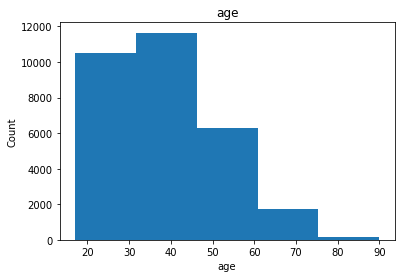

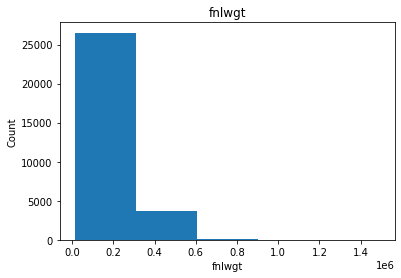

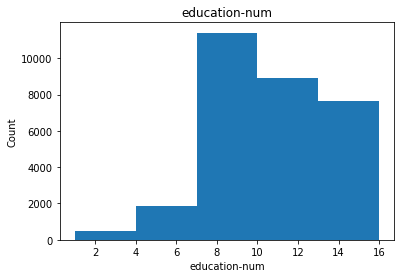

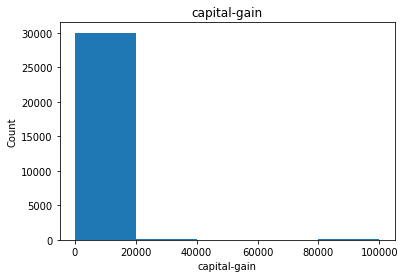

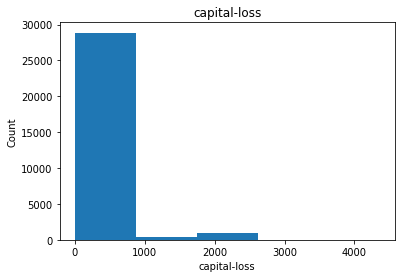

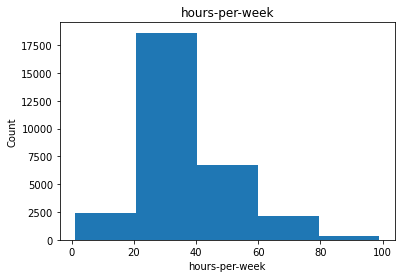

In [12]:
# numerical distribution

for feature in numerical_feature:
    data = df.copy()
    
    data[feature].hist(bins=5,grid=False)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

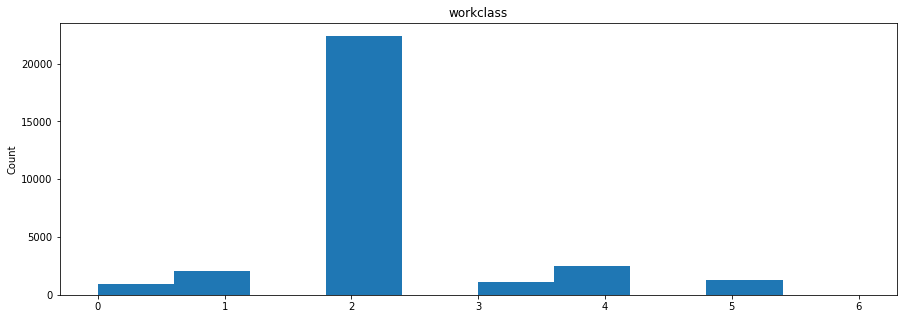

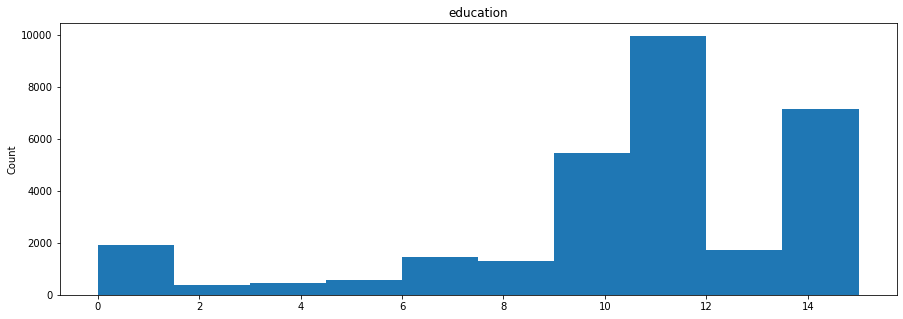

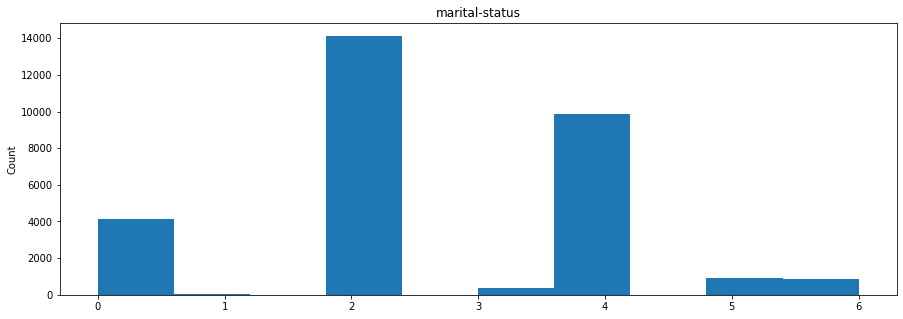

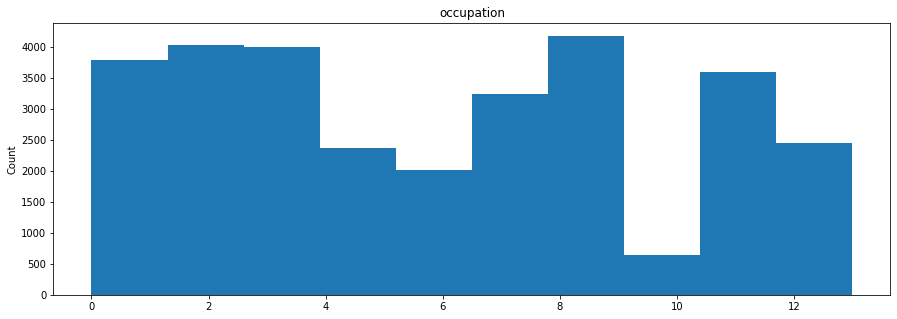

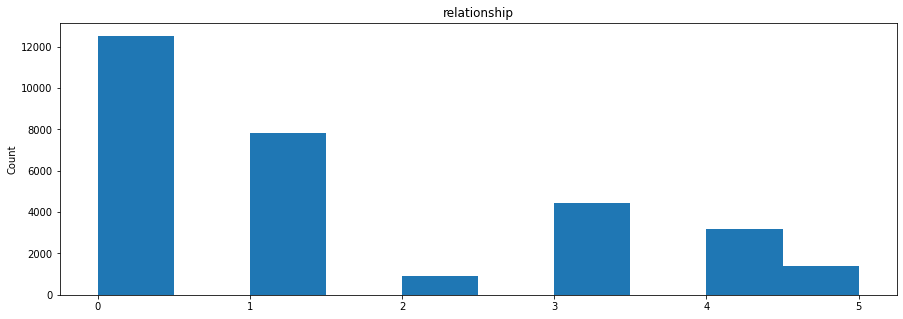

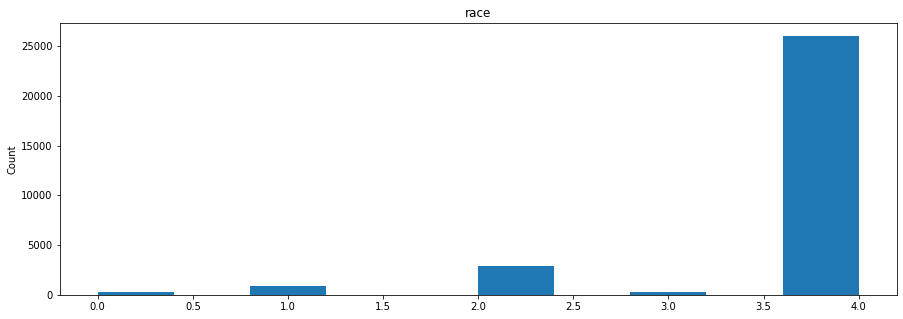

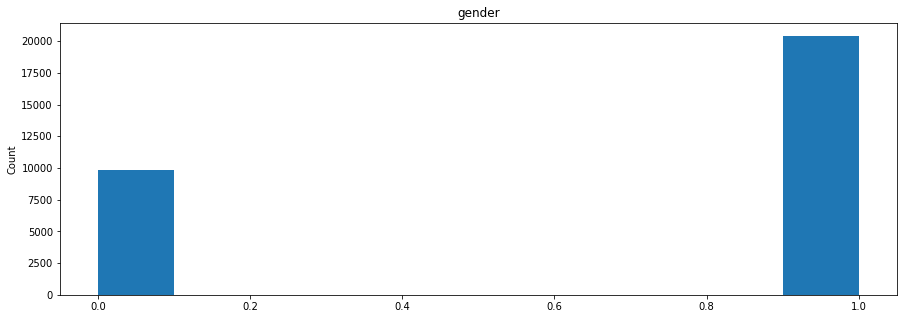

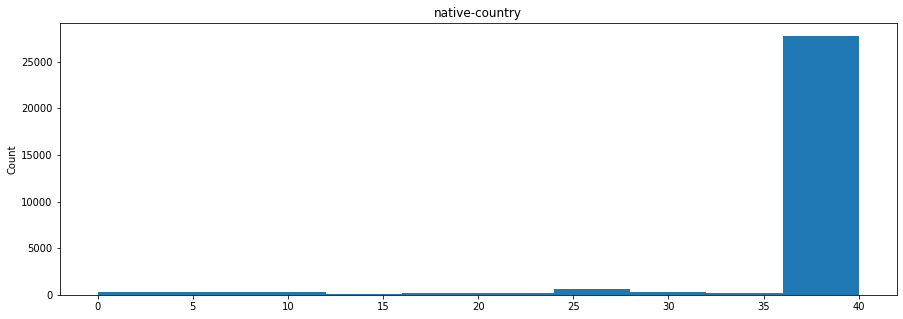

In [45]:
# Categorical distribution

for feature in categorical_feature:
    data = df.copy()
    plt.figure(figsize=(15,5))
    data[feature].hist(grid=False)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

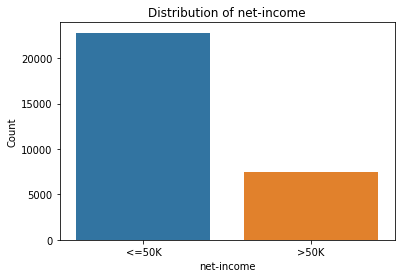

In [14]:
#  Target distribution

sns.countplot(df.iloc[:,-1])
plt.ylabel("Count")
plt.title("Distribution of net-income")
plt.show()

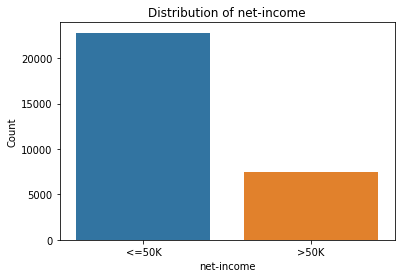

In [15]:
#  Target distribution

sns.countplot(df.iloc[:,-1])
plt.ylabel("Count")
plt.title("Distribution of net-income")
plt.show()

In [16]:
# Bivariate analysis / finding outliers

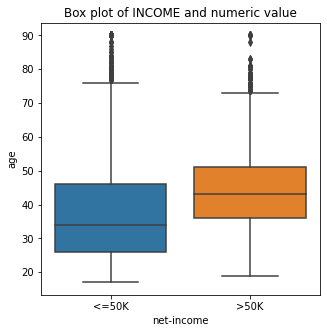

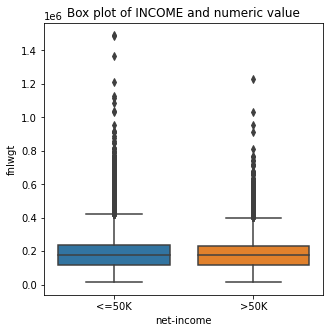

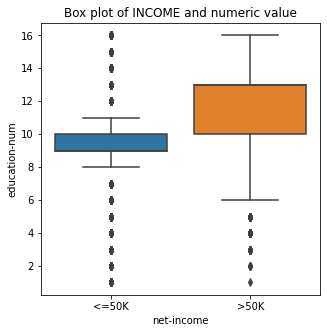

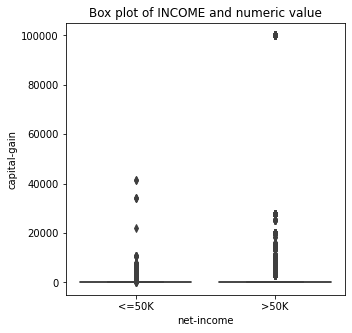

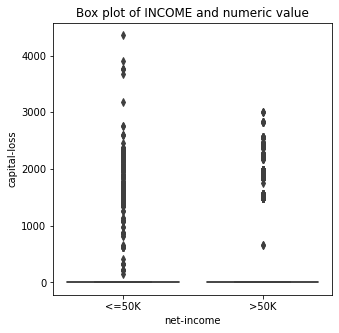

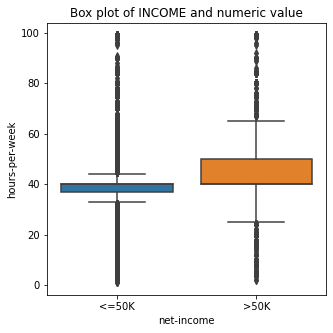

In [17]:
for feature in numerical_feature:
    fig = plt.figure(figsize=(5,5))
    sns.boxplot(x=df['net-income'],y=feature,data=df).set_title('Box plot of INCOME and numeric value')
    plt.show()

In [18]:
# describe

df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,30282.000000,3.028200e+04,30282.000000,30282.000000,30282.000000,30282.000000
mean,38.473582,1.894935e+05,10.120104,1100.301862,89.019748,40.948682
std,13.220164,1.054008e+05,2.549831,7540.452703,404.907546,12.039213
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.170625e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.779320e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.375245e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
# Modeling

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
label = LabelEncoder()

In [22]:
for feature in df.columns:
    if df[feature].dtypes == 'O':
        df[feature] = label.fit_transform(df[feature])

In [23]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,60,4,235535,11,9,2,3,0,4,1,0,0,48,38,0
1,28,4,123983,15,10,2,11,3,1,1,0,0,63,34,0
2,71,4,130436,3,2,0,2,1,4,0,0,0,28,38,0
4,50,2,128143,9,13,2,2,0,4,1,0,1887,50,38,1
5,35,2,53553,15,10,2,11,0,4,1,7298,0,48,38,1


In [24]:
#  again we will split into x and y

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [25]:
# import train and test model to split data into train and test

from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [27]:
x.describe()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
count,30282.000000,30282.000000,3.028200e+04,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000,30282.000000
mean,38.473582,2.201110,1.894935e+05,10.315039,10.120104,2.593818,5.941979,1.411796,3.677135,0.673932,1100.301862,89.019748,40.948682,36.398686
std,13.220164,0.951088,1.054008e+05,3.809066,2.549831,1.493554,4.024852,1.597971,0.835705,0.468780,7540.452703,404.907546,12.039213,6.092670
min,17.000000,0.000000,1.349200e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,2.000000,1.170625e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,2.000000,1.779320e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,47.000000,2.000000,2.375245e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,6.000000,1.490400e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [28]:
# transform values

from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
X_train = minmaxscaler.fit_transform(X_train)
X_test = minmaxscaler.fit_transform(X_test)

In [29]:
# LOGISTICREGRESSION

In [30]:
# import model

from sklearn.linear_model import LogisticRegression 

In [31]:
model=LogisticRegression()

In [32]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
model.score(X_test,y_test)

0.8116229156348027

In [34]:
# DECISION TREE

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [37]:
clf_tree.score( X_test,y_test)

0.8327554895162622

In [38]:
# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
KNNmodel = KNeighborsClassifier(n_neighbors = 5)
KNNmodel.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [41]:
KNNmodel.score(X_test,y_test)

0.8177315502724121

In [46]:
# Logestic ------> 81%
# Decision Tree ----------> 82%
# KNN -------------> 81%